# Removing Trends - Lab

## Introduction

In this lab, you'll practice your detrending skills!

## Objectives

You will be able to:
* Learn how to remove trends and seasonality
* Use a log transformation to minimize non-stationarity
* Use rolling means to reduce non-stationarity
* Use differencing to reduce non-stationarity

## Detrending the Airpassenger data

In [1]:
# Import necessary libraries
import pandas as pd, numpy as np, matplotlib.pyplot as plt
# Import passengers.csv and set it as a time-series object. Plot the TS
ts = pd.read_csv('passengers.csv')
ts.head()

,Month,#Passengers
0,1949-01-01,112
1,1949-02-01,118
2,1949-03-01,132
3,1949-04-01,129
4,1949-05-01,121


In [2]:
ts.Month=pd.to_datetime(ts.Month)
ts.set_index('Month', inplace=True)
ts.head()
print(ts.info())
ts.head()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 144 entries, 1949-01-01 to 1960-12-01
Data columns (total 1 columns):
#Passengers    144 non-null int64
dtypes: int64(1)
memory usage: 2.2 KB
None


,#Passengers
Month,
1949-01-01,112
1949-02-01,118
1949-03-01,132
1949-04-01,129
1949-05-01,121


## Create a stationarity check

At this stage, we can use the code from previous labs to create a function `stationarity_check(ts)` that takes in a time series object and performs stationarity checks including rolling statistics and the Dickey Fuller test. 

We want the output of the function to:
- Plot the original time series along with the rolling mean and rolling standard deviation in one plot
- Output the results of the Dickey-Fuller test

In [6]:
# Create a function to check for the stationarity of a given timeseries using rolling stats and DF test
# Collect and package the code from previous lab
from statsmodels.tsa.stattools import adfuller

def stationarity_check(ts, window_size=10):
    rolmean=ts.rolling(window_size).mean()
    rolstd=ts.rolling(window_size).std()
    fig = plt.figure(figsize=(12,7))
    orig = plt.plot(ts, color='blue',label='Original')
    mean = plt.plot(rolmean, color='red', label='Rolling Mean')
    std = plt.plot(rolstd, color='black', label ='Rolling Std')
    difference = plt.plot(ts-rolmean, color='yellow', label='Mean_adjusted')
    plt.legend(loc='best')
    plt.title('Rolling Mean & Standard Deviation')
    plt.show(block=False)
    
    dftest = adfuller(ts[ts.columns[0]])
    dfoutput = pd.Series(dftest[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])
    for key,value in dftest[4].items():
        dfoutput['Critical Value (%s)'%key] = value
    print(dfoutput)

Use your newly created function on the airpassenger data set.

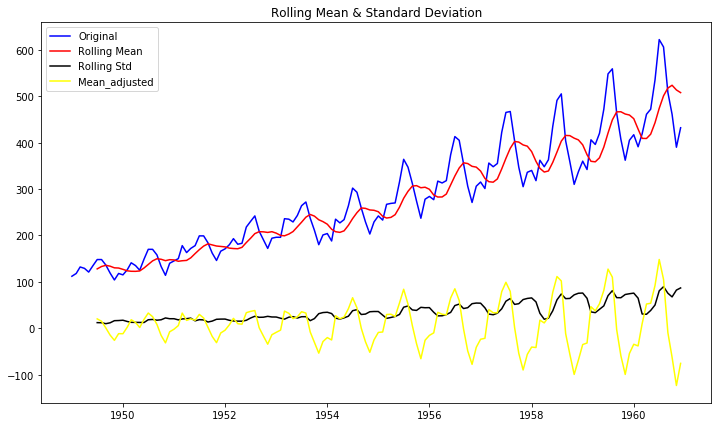

Test Statistic                   0.815369
p-value                          0.991880
#Lags Used                      13.000000
Number of Observations Used    130.000000
Critical Value (1%)             -3.481682
Critical Value (5%)             -2.884042
Critical Value (10%)            -2.578770
dtype: float64


In [11]:
# Code here
stationarity_check(ts, window_size=7)

## Perform a log() and sqrt() transform

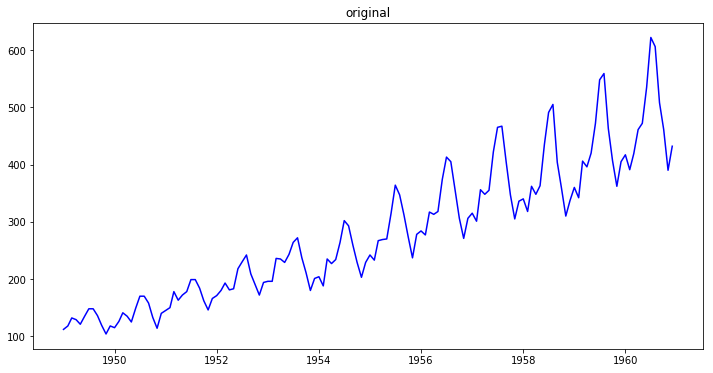

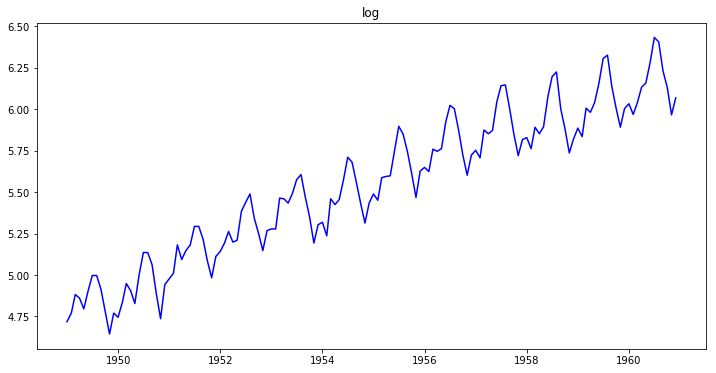

Text(0.5, 1.0, 'sqrt')

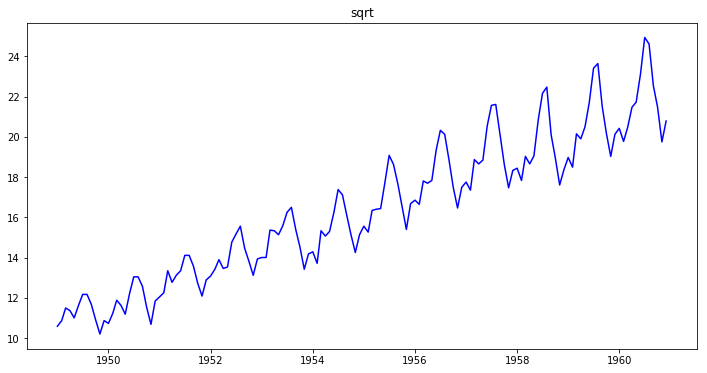

In [14]:
# Log transform timeseries and compare with original to check the effect
ts_log = np.log(ts)
ts_sqrt = np.sqrt(ts)
fig = plt.figure(figsize=(12,6))
plt.plot(ts,  color='blue');
plt.title('original')
plt.show()
fig = plt.figure(figsize=(12,6))
plt.plot(ts_log, color='blue');
plt.title('log')
plt.show()
fig = plt.figure(figsize=(12,6))
plt.plot(ts_sqrt, color='blue');
plt.title('sqrt')

moving forward, let's keep working with the log transformed data before subtracting rolling mean, differencing, etc.

## Subtracting the rolling mean

Create a rolling mean using your log transformed time series, with a time window of 7. Plot the log-transformed time series and the rolling mean together.

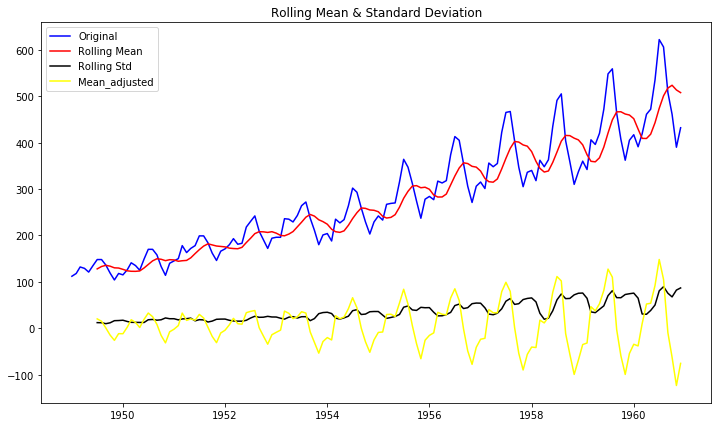

In [15]:
# your code here
rolmean=ts.rolling(7).mean()
rolstd=ts.rolling(7).std()
fig = plt.figure(figsize=(12,7))
orig = plt.plot(ts, color='blue',label='Original')
mean = plt.plot(rolmean, color='red', label='Rolling Mean')
std = plt.plot(rolstd, color='black', label ='Rolling Std')
difference = plt.plot(ts-rolmean, color='yellow', label='Mean_adjusted')
plt.legend(loc='best')
plt.title('Rolling Mean & Standard Deviation')
plt.show(block=False)

Now, subtract the rolling mean from the time series, look at the 10 first elements of the result and plot the result.

In [20]:
# Subtract the moving average from the original data and check head for Nans
diff=ts-rolmean
diff.head(15)

,#Passengers
Month,
1949-01-01,NaN
1949-02-01,NaN
1949-03-01,NaN
1949-04-01,NaN
1949-05-01,NaN
1949-06-01,NaN
1949-07-01,20.142857
1949-08-01,15.000000
1949-09-01,0.428571


In [23]:
# Drop the NaN values from timeseries calculated above
diff=diff.dropna()
diff.head()

,#Passengers
Month,
1949-07-01,20.142857
1949-08-01,15.000000
1949-09-01,0.428571
1949-10-01,-14.714286
1949-11-01,-26.142857


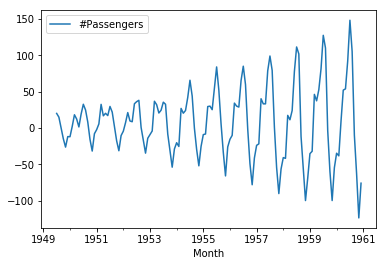

In [24]:
# Plot the result
diff.plot()

Finally, use your function `check_stationarity` to see if this series is considered stationary!

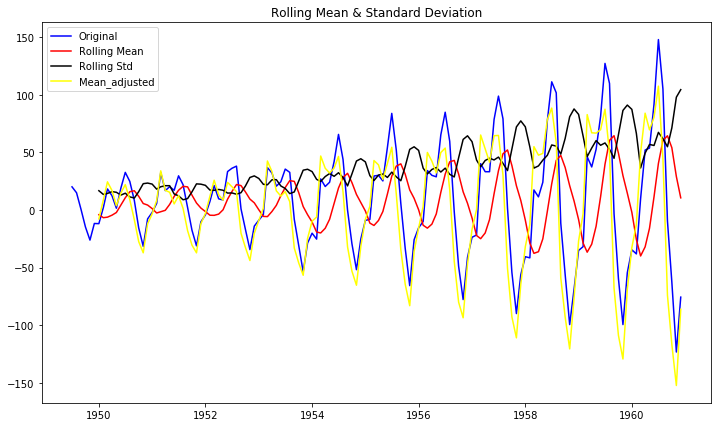

Test Statistic                  -2.974271
p-value                          0.037368
#Lags Used                      13.000000
Number of Observations Used    124.000000
Critical Value (1%)             -3.484220
Critical Value (5%)             -2.885145
Critical Value (10%)            -2.579359
dtype: float64


In [25]:
# Your code here
stationarity_check(diff, 7)

### Based on the visuals and on the Dickey-Fuller test, what do you conclude?


## Subtracting the weighted rolling mean

Repeat all the above for the *weighter* rolling mean. Start from the log-transformed data again. Compare the Dickey-Fuller Test results. What do you conclude?

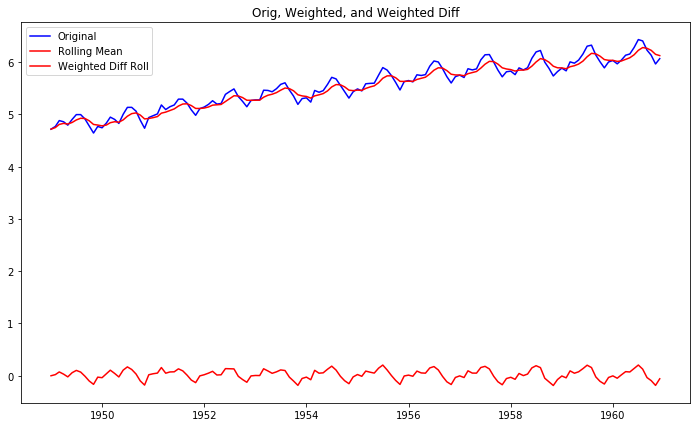

In [36]:
# Use Pandas ewma() to calculate Weighted Moving Average of ts_log
exp_rolmean=ts_log.ewm(halflife=2).mean()
# Plot the original data with exp weighted average
fig = plt.figure(figsize=(12,7))

orig = plt.plot(ts_log, color='blue',label='Original')
mean = plt.plot(exp_rolmean, color='red', label='Rolling Mean')
diff_weighted=ts_log-exp_rolmean
weighted_diff_plot = plt.plot(diff_weighted, color='red', label='Weighted Diff Roll')
plt.legend(loc='best')
plt.title('Orig, Weighted, and Weighted Diff')
plt.show(block=False)

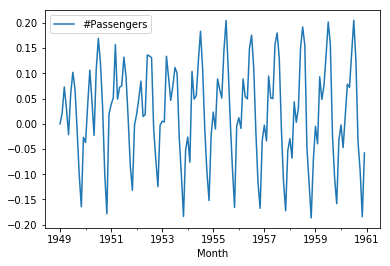

In [37]:
# Subtract the moving average from the original data and plot
diff_weighted.plot()

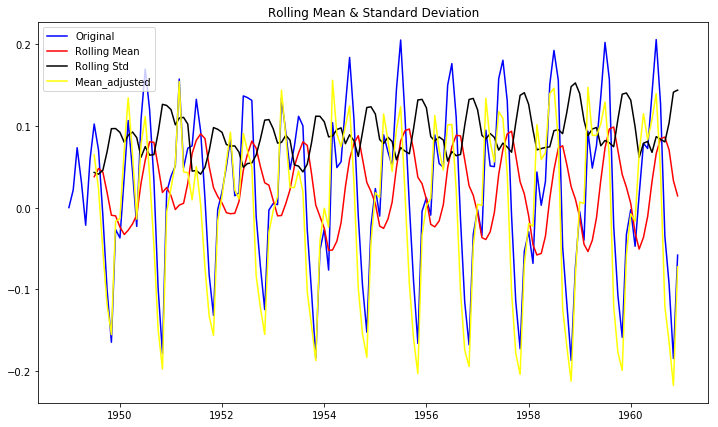

Test Statistic                  -3.087696
p-value                          0.027477
#Lags Used                      13.000000
Number of Observations Used    130.000000
Critical Value (1%)             -3.481682
Critical Value (5%)             -2.884042
Critical Value (10%)            -2.578770
dtype: float64


In [38]:
# do a stationarity check
stationarity_check(diff_weighted, 7)

### Based on the visuals and on the Dickey-Fuller test, what do you conclude?


## Differencing

Using exponentially weighted moving averages, we seem to have removed the upward trend, but not the seasonality issue. Now use differencing to remove seasonality. Make sure you use the right amount of `periods`. Start from the log-transformed, exponentially weighted rolling mean-subtracted series.

After you differenced the series, run the `stationarity check` again.

In [40]:
# difference your data and look at the head
diff_seasonality_removal=diff_weighted.diff(periods=12)

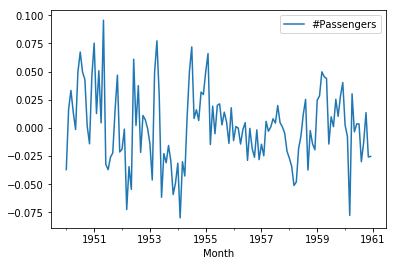

In [41]:
# plot your differenced time series
diff_seasonality_removal.plot()

In [43]:
# drop nas
diff_seasonality_removal.dropna(inplace = True)

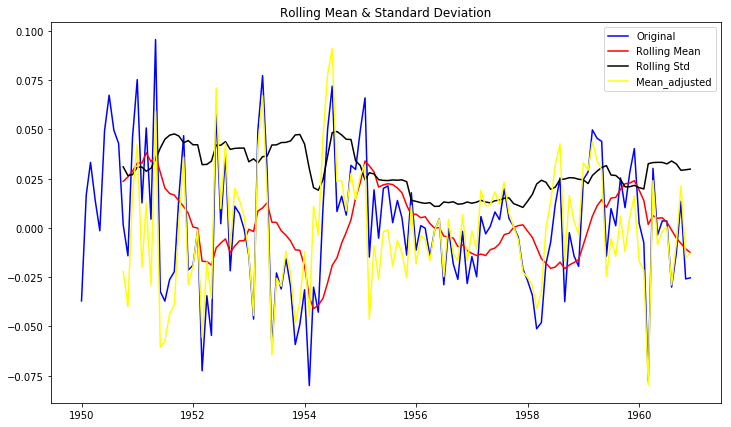

Test Statistic                  -4.158133
p-value                          0.000775
#Lags Used                      12.000000
Number of Observations Used    119.000000
Critical Value (1%)             -3.486535
Critical Value (5%)             -2.886151
Critical Value (10%)            -2.579896
dtype: float64


In [46]:
# perform the stationarity check
stationarity_check(diff_seasonality_removal)

### Your conclusion

## Summary 

In this lab, you learned how to make time series stationary through using log transforms, rolling means and differencing.